In [43]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data=pd.read_csv("bank_employee_churn.csv")
data.head()

,EmployeeID,Age,Gender,Department,Salary,Experience,JobSatisfaction,WorkLifeBalance,TrainingHours,Promotions,Overtime,Churn
0,1,50,Female,HR,48888,27,3,4,73,3,No,0
1,2,36,Male,Finance,73732,18,4,3,12,4,Yes,1
2,3,29,Male,Finance,111623,4,2,3,78,0,No,0
3,4,42,Male,HR,76305,1,5,1,32,3,No,0
4,5,40,Male,Finance,76037,1,3,3,62,2,No,1


In [45]:
# cols=list(data.columns)
# col_to_move="Age"
# cols.insert(3,cols.pop(cols.index(col_to_move)))
# col2_to_move="Overtime"
# cols.insert(3,cols.pop(cols.index(col2_to_move)))
# data=data[cols]
# data.head()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       1000 non-null   int64 
 1   Age              1000 non-null   int64 
 2   Gender           1000 non-null   object
 3   Department       1000 non-null   object
 4   Salary           1000 non-null   int64 
 5   Experience       1000 non-null   int64 
 6   JobSatisfaction  1000 non-null   int64 
 7   WorkLifeBalance  1000 non-null   int64 
 8   TrainingHours    1000 non-null   int64 
 9   Promotions       1000 non-null   int64 
 10  Overtime         1000 non-null   object
 11  Churn            1000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 93.9+ KB


In [47]:
data.Department.unique()

array(['HR', 'Finance', 'IT', 'Marketing', 'Customer Service'],
      dtype=object)

In [48]:
x=data.iloc[:,1:11]
x.head()

,Age,Gender,Department,Salary,Experience,JobSatisfaction,WorkLifeBalance,TrainingHours,Promotions,Overtime
0,50,Female,HR,48888,27,3,4,73,3,No
1,36,Male,Finance,73732,18,4,3,12,4,Yes
2,29,Male,Finance,111623,4,2,3,78,0,No
3,42,Male,HR,76305,1,5,1,32,3,No
4,40,Male,Finance,76037,1,3,3,62,2,No


In [49]:
y=data.iloc[:,-1:].values
y[:5]

array([[0],
       [1],
       [0],
       [0],
       [1]], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=47)

In [51]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [52]:
from torch.utils.data import Dataset,DataLoader

class Data(Dataset):
    def __init__(self,x,y):
        super().__init__()
        le=LabelEncoder()
        x.iloc[:,1]=le.fit_transform(x.iloc[:,1])
        x.iloc[:,9]=le.fit_transform(x.iloc[:,9])
        ct=ColumnTransformer(
            [
                ("One hot encoder",OneHotEncoder(),[2]),
                ("Standard Scaler",StandardScaler(),[0,3,4,5,6,7,8]),    
            ],
            remainder="passthrough"
        )
        x=ct.fit_transform(x)
        x=x[:,1:]
        impute=SimpleImputer(strategy="mean")
        x=impute.fit_transform(x)
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.x.shape[0]
        
        

In [53]:
Data(x_train,y_train)[799]

(tensor([ 0.0000,  0.0000,  1.0000,  0.0000, -0.7166, -0.8576,  1.3193, -0.0308,
          0.4992, -0.3047,  1.4709,  0.0000,  1.0000]),
 tensor([0.]))

In [54]:
train_data=Data(x_train,y_train)
test_data=Data(x_test,y_test)

In [55]:
for len,(x,y) in enumerate(train_data):
    print(len,"|",x,y)

0 | tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.7119,  1.3888, -1.1836,  0.6941,
         0.4992, -0.3047, -0.6869,  0.0000,  0.0000]) tensor([0.])
1 | tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.6227,  0.8528,  0.0678, -1.4805,
        -1.2956,  0.8382, -1.4062,  1.0000,  1.0000]) tensor([0.])
2 | tensor([ 0.0000,  0.0000,  0.0000,  1.0000,  0.6227, -0.1388, -0.1110, -0.0308,
        -0.3982, -1.2951,  1.4709,  1.0000,  0.0000]) tensor([0.])
3 | tensor([ 0.0000,  0.0000,  1.0000,  0.0000,  1.6048, -0.0330,  0.1572,  0.6941,
        -0.3982, -0.6856,  0.7516,  1.0000,  0.0000]) tensor([0.])
4 | tensor([ 1.0000,  0.0000,  0.0000,  0.0000,  1.5155, -1.4141, -0.6473,  1.4189,
        -0.3982,  0.7239, -0.6869,  0.0000,  0.0000]) tensor([1.])
5 | tensor([ 0.0000,  0.0000,  0.0000,  0.0000, -0.1809,  1.1233, -0.0216,  0.6941,
         0.4992, -1.7141,  1.4709,  0.0000,  0.0000]) tensor([1.])
6 | tensor([ 0.0000,  1.0000,  0.0000,  0.0000, -0.7166, -0.9179, -0.6473, -0.0308,
        -0

In [56]:
train_dataloader=DataLoader(
    dataset=train_data,
    shuffle=True,
    batch_size=16,
    drop_last=False,
)

test_dataloader=DataLoader(
    dataset=test_data,
    shuffle=False,
    batch_size=16,
    drop_last=True
)

In [57]:
from torch import nn,optim
inp_dim=13
hidden1_dim=104
hidden2_dim=52
hidden3_dim=26
out_dim=1
class NeuralNetwork(nn.Module):
    def __init__(self,inp_dim,hidden1_dim,hidden2_dim,hidden3_dim,out_dim):
        super().__init__()
        #first hidden layer
        self.layer1=nn.Linear(
            in_features=inp_dim,
            out_features=hidden1_dim,
        )
        # self.layer2=nn.Linear(
        #     in_features=hidden1_dim,
        #     out_features=hidden2_dim,
        # )
        # self.layer3=nn.Linear(
        #     in_features=hidden2_dim,
        #     out_features=hidden3_dim,
        # )
        #output layer
        self.layer4=nn.Linear(
            in_features=hidden1_dim,
            out_features=out_dim,
        )
        
    def forward(self,x):
        x=self.layer1(x)
        x=nn.functional.relu(x)
        # x=self.layer2(x)
        # x=nn.functional.relu(x)
        # x=self.layer3(x)
        # x=nn.functional.relu(x)
        x=self.layer4(x)
        x=nn.functional.sigmoid(x)
        return x
    
model=NeuralNetwork(inp_dim,hidden1_dim,hidden2_dim,hidden3_dim,out_dim)
model
        

NeuralNetwork(
  (layer1): Linear(in_features=13, out_features=104, bias=True)
  (layer4): Linear(in_features=104, out_features=1, bias=True)
)

In [58]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[-0.2312,  0.0655, -0.2288,  ...,  0.0466,  0.0752, -0.1124],
        [-0.0964,  0.0658,  0.2482,  ..., -0.1279,  0.2141, -0.2238],
        [-0.1686,  0.1221, -0.2244,  ..., -0.0036,  0.0768, -0.2582],
        ...,
        [ 0.1577, -0.1164, -0.1830,  ...,  0.0754,  0.2261, -0.2048],
        [ 0.2396,  0.1199, -0.1165,  ...,  0.1128, -0.2219, -0.1308],
        [-0.0262, -0.1657,  0.0962,  ...,  0.0254,  0.1042, -0.2550]],
       requires_grad=True)
Parameter containing:
tensor([ 0.1620, -0.1543, -0.0306, -0.1711, -0.1520,  0.2234,  0.1133,  0.0511,
         0.1930, -0.2703,  0.2072,  0.0913, -0.0336, -0.0408,  0.1634,  0.1819,
        -0.2477,  0.1973, -0.1454, -0.1599,  0.2647,  0.1440, -0.0247,  0.1107,
         0.0370,  0.1752,  0.1211,  0.1268, -0.2747, -0.1100,  0.1213, -0.2469,
         0.1584,  0.1934, -0.0805, -0.0968, -0.1061,  0.1695,  0.2511,  0.0283,
         0.1094, -0.1542,  0.0321,  0.0406, -0.1571,  0.1912,  0.2632, -0.1785,
         0.1889

In [59]:
for len,(x,y) in enumerate(train_dataloader):
    print(len,"|", x,y)

0 | tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  8.0123e-01,
         -1.0225e+00,  6.0415e-01, -3.0807e-02,  1.3965e+00,  6.8578e-01,
          7.5163e-01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00, -1.6988e+00,
          8.6677e-01,  6.9354e-01,  6.9406e-01, -1.2956e+00, -2.6656e-01,
         -6.8689e-01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00, -1.2523e+00,
          1.0154e+00,  1.5721e-01, -7.5567e-01,  4.9916e-01, -7.6178e-01,
         -6.8689e-01,  0.0000e+00,  1.0000e+00],
        [ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  1.7623e-01,
          1.6210e+00, -7.3667e-01, -7.5567e-01, -1.2956e+00, -1.3332e+00,
          7.5163e-01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  1.3369e+00,
          7.2683e-01, -1.0048e+00, -1.4805e+00, -3.9820e-01,  3.8103e-01,
         -1.4062e+00,  1.0000e+00,  1.0000e+00],
        [ 0

In [60]:
loss_fn=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [61]:
from statistics import mean
device=torch.device("cpu")
print(device)
model1=model.to(device)
model1.train()
epochs=100
pred=[]
avg_loss=[]
for epoch in range(epochs):
    loss_val=[]
    total,correct=0,0
    for x,y in train_dataloader:
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()
        predict=model1(x)
        total+=x.shape[0]
        pred=np.where(predict>0.5,1,0)
        correct+=(pred==y).sum()
        loss=loss_fn(predict,y)
        loss_val.append(loss.item())
        loss.backward()
        optimizer.step()
    avg_loss.append(mean(loss_val))
    print(f"Epoch {epoch} | Loss : {np.mean(loss_val)} | Accuracy : {100*correct/total}")

cpu
Epoch 0 | Loss : 0.5535347068309784 | Accuracy : 77.625
Epoch 1 | Loss : 0.5360439711809158 | Accuracy : 77.75
Epoch 2 | Loss : 0.5328983455896378 | Accuracy : 77.75
Epoch 3 | Loss : 0.5288742935657501 | Accuracy : 77.75
Epoch 4 | Loss : 0.5276266288757324 | Accuracy : 77.75
Epoch 5 | Loss : 0.5256165879964828 | Accuracy : 77.75
Epoch 6 | Loss : 0.522629876434803 | Accuracy : 77.75
Epoch 7 | Loss : 0.5230480480194092 | Accuracy : 77.75
Epoch 8 | Loss : 0.51926773250103 | Accuracy : 77.75
Epoch 9 | Loss : 0.5169353449344635 | Accuracy : 77.75
Epoch 10 | Loss : 0.515857852101326 | Accuracy : 77.75
Epoch 11 | Loss : 0.5141754996776581 | Accuracy : 77.75
Epoch 12 | Loss : 0.5081577736139298 | Accuracy : 77.5
Epoch 13 | Loss : 0.5099848055839539 | Accuracy : 77.875
Epoch 14 | Loss : 0.5086117196083069 | Accuracy : 77.625
Epoch 15 | Loss : 0.5053784745931625 | Accuracy : 77.875
Epoch 16 | Loss : 0.5033693218231201 | Accuracy : 77.75
Epoch 17 | Loss : 0.5039262783527374 | Accuracy : 78.0


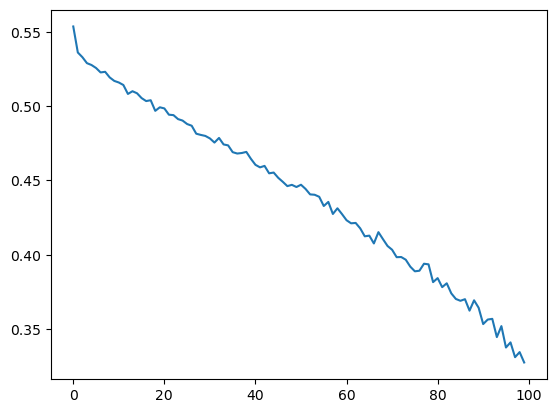

In [62]:
plt.plot(range(epochs),avg_loss)

In [63]:
y_pred=[]
cor=0
with torch.inference_mode():
    total,correct=0,0
    for x,y in test_dataloader:
        x=x.to(device)
        y=y.to(device)
        predicted=model1(x)
        predict.detach().cpu()
        output=np.where(predict>0.5,1,0)
        y_pred.append(output)
        total+=y.shape[0]
        cor=(output==y).sum()
        print(f"Correct: {cor}")
        correct+=((output==y).sum())
    print(f"Accuracy for {total} samples is {100*(correct/total)}")

Correct: 8
Correct: 14
Correct: 13
Correct: 9
Correct: 11
Correct: 13
Correct: 11
Correct: 12
Correct: 13
Correct: 7
Correct: 14
Correct: 13
Accuracy for 192 samples is 71.875
